**Importing time-series data**

In [1]:
import pandas as pd
import numpy as np

In [2]:
# load time series dataset
df_power = pd.read_csv("new_ndvi_evi_qa_lc_nl_gelderland_loobos_2000_2020.csv")
df_power.columns


Index(['pixel', 'year', 'ndvi', 'evi', 'qa', 'lai', 'time', 'land_cover',
       'lc_time'],
      dtype='object')

In [3]:
df_power.tail(10)

,pixel,year,ndvi,evi,qa,lai,time,land_cover,lc_time
502540,999,2019,0.764807,0.560225,0.0,0.190338,2019-07-12,NaN,NaN
502541,999,2019,0.757526,0.548312,0.0,0.342728,2019-07-28,NaN,NaN
502542,999,2019,0.773593,0.521724,0.0,0.086479,2019-08-13,NaN,NaN
502543,999,2019,0.744093,0.525534,1.0,0.201262,2019-08-29,NaN,NaN
502544,999,2019,0.805071,0.544655,0.0,0.265936,2019-09-14,NaN,NaN
502545,999,2019,0.819169,0.523767,1.0,0.166500,2019-09-30,NaN,NaN
502546,999,2019,0.693204,0.364999,1.0,0.102764,2019-10-16,NaN,NaN
502547,999,2019,0.642648,0.308305,0.0,0.079452,2019-11-01,NaN,NaN
502548,999,2019,0.670763,0.396808,0.0,0.153876,2019-11-17,NaN,NaN
502549,999,2019,0.743137,0.364500,1.0,0.270555,2019-12-03,NaN,NaN


In [4]:
df_power.shape


(502550, 9)

In [5]:
df_power.dtypes

pixel           int64
year            int64
ndvi          float64
evi           float64
qa            float64
lai           float64
time           object
land_cover    float64
lc_time        object
dtype: object

In [6]:
#convert object to datetime format
df_power['time'] = pd.to_datetime(df_power['time'])

In [7]:
df_power.dtypes

pixel                  int64
year                   int64
ndvi                 float64
evi                  float64
qa                   float64
lai                  float64
time          datetime64[ns]
land_cover           float64
lc_time               object
dtype: object

Now that the Date column is in correct datatype, let’s set it as the DataFrame’s index because in time series analysis the index column is always datetime column.

In [8]:
df_power = df_power.set_index('time')
df_power.tail(3)

,pixel,year,ndvi,evi,qa,lai,land_cover,lc_time
time,,,,,,,,
2019-11-01,999,2019,0.642648,0.308305,0.0,0.079452,NaN,NaN
2019-11-17,999,2019,0.670763,0.396808,0.0,0.153876,NaN,NaN
2019-12-03,999,2019,0.743137,0.364500,1.0,0.270555,NaN,NaN


In [9]:
df_power.index


DatetimeIndex(['2001-10-16', '2001-12-03', '2001-08-29', '2001-09-14',
               '2001-06-26', '2001-04-07', '2001-09-30', '2001-02-02',
               '2001-02-18', '2001-07-28',
               ...
               '2019-07-12', '2019-07-28', '2019-08-13', '2019-08-29',
               '2019-09-14', '2019-09-30', '2019-10-16', '2019-11-01',
               '2019-11-17', '2019-12-03'],
              dtype='datetime64[ns]', name='time', length=502550, freq=None)

In [11]:
# Add columns with year, month, and weekday name
df_power['Year'] = df_power.index.year
df_power['Month'] = df_power.index.month
#df_power['Weekday Name'] = df_power.index.weekday_name

In [12]:
# Display a random sampling of 5 rows
df_power.sample(5, random_state=0)

,pixel,year,ndvi,evi,qa,lai,land_cover,lc_time,Year,Month
time,,,,,,,,,,
2008-03-21,731,2008,0.661249,0.425339,1.0,0.108094,9.0,2008-01-01,2008,3
2013-04-23,134,2013,0.464838,0.237289,0.0,0.123175,9.0,2013-01-01,2013,4
2011-11-01,306,2011,0.646085,0.273582,0.0,0.122809,8.0,2011-01-01,2011,11
2006-08-29,667,2006,0.784275,0.482867,0.0,0.025091,9.0,2006-01-01,2006,8
2014-06-10,227,2014,0.762447,0.448091,1.0,0.135544,8.0,2014-01-01,2014,6


In [13]:
df_power.loc['2015-10-02']

,pixel,year,ndvi,evi,qa,lai,land_cover,lc_time,Year,Month
time,,,,,,,,,,


In [14]:
df_power.loc['2017-01-01':'2017-12-30']

,pixel,year,ndvi,evi,qa,lai,land_cover,lc_time,Year,Month
time,,,,,,,,,,
2017-04-23,1,2017,0.694523,0.418382,0.0,0.151929,7.0,2017-01-01,2017,4
2017-12-19,1,2017,0.553500,0.311100,3.0,0.010000,7.0,2017-01-01,2017,12
2017-01-01,1,2017,0.648790,0.256002,1.0,0.295249,7.0,2017-01-01,2017,1
2017-08-29,1,2017,0.695858,0.393786,1.0,0.200814,7.0,2017-01-01,2017,8
2017-06-26,1,2017,0.613601,0.342543,3.0,0.122878,7.0,2017-01-01,2017,6
...,...,...,...,...,...,...,...,...,...,...
2017-03-06,999,2017,0.730576,0.471538,0.0,0.082886,9.0,2017-01-01,2017,3
2017-07-12,999,2017,0.857645,0.642300,0.0,0.216587,9.0,2017-01-01,2017,7
2017-12-19,999,2017,0.637495,0.438447,3.0,0.026003,9.0,2017-01-01,2017,12


**Visualization for time series analysis**



In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(16, 4)})
plt.rcParams['figure.dpi'] = 150

Let’s create a line plot of the full time series of Germany’s daily electricity consumption, using the pandas's plot() method.

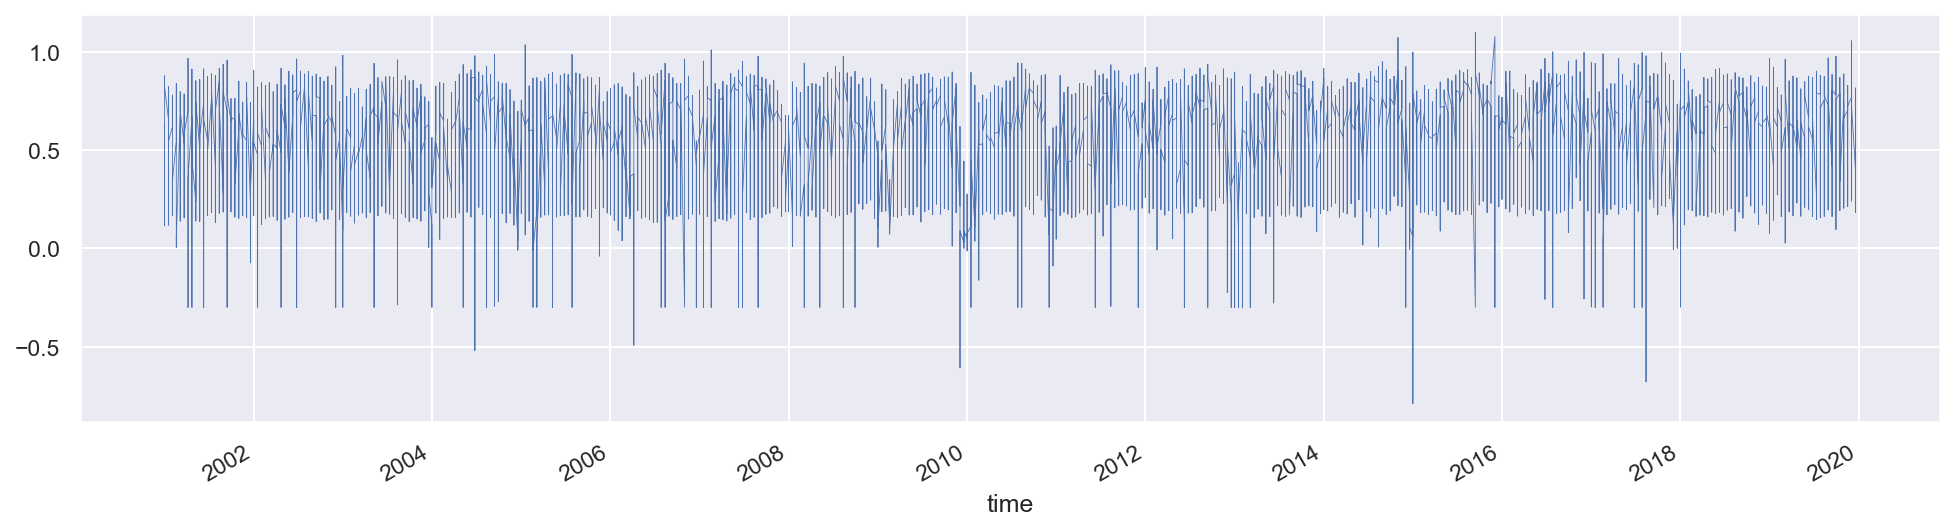

In [18]:
#df_power['ndvi'].plot(linewidth=0.4)

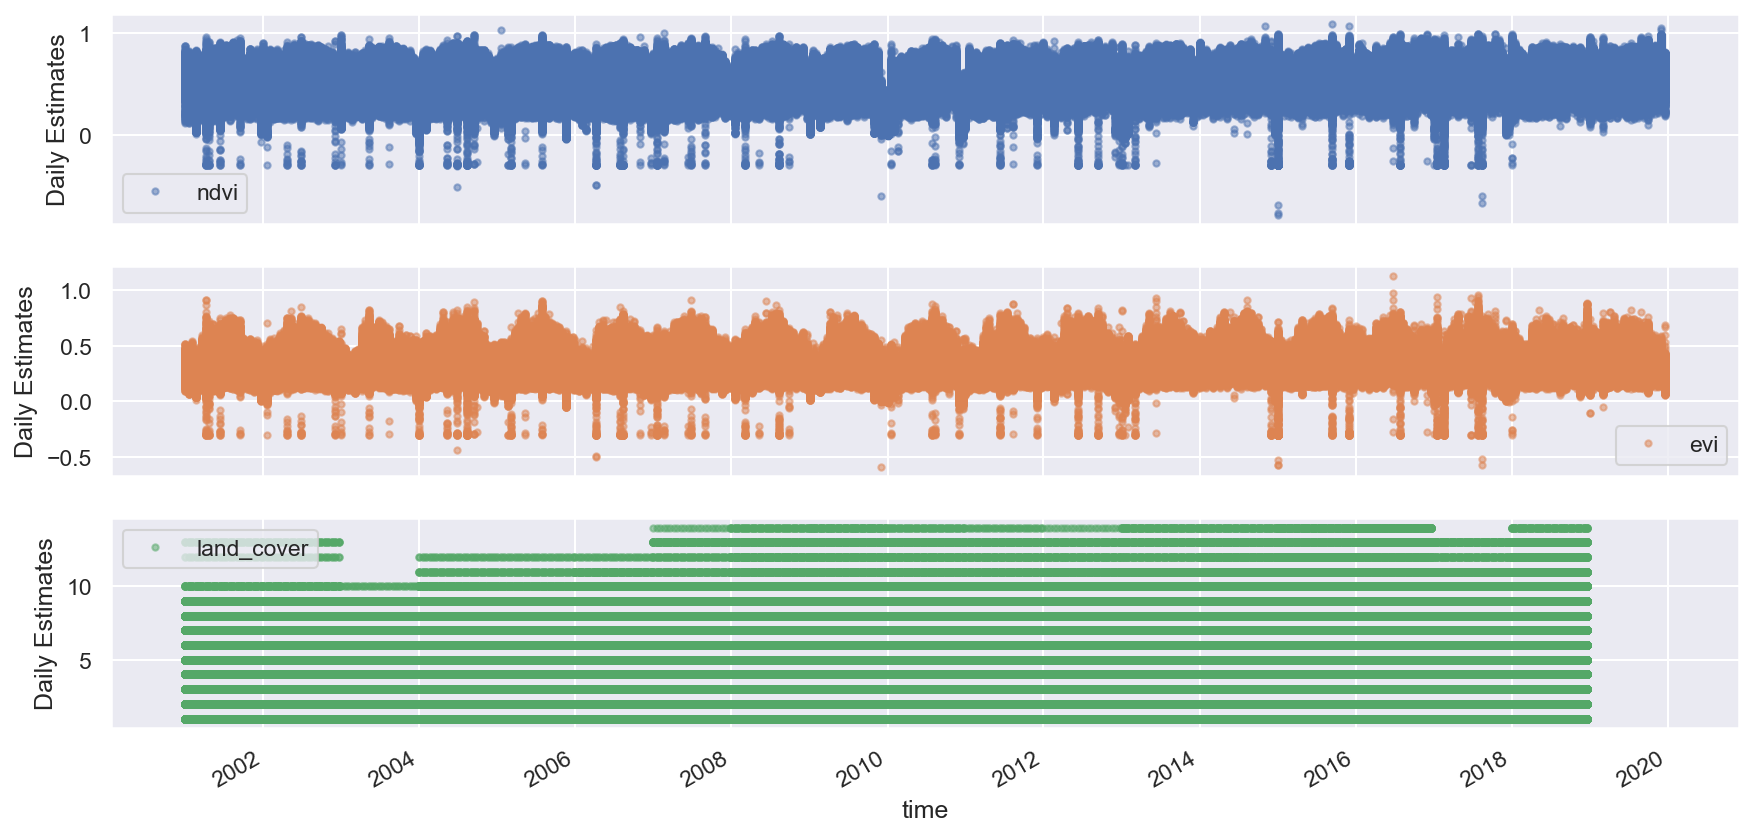

In [19]:
cols_to_plot = ['ndvi', 'evi', 'land_cover']
axes = df_power[cols_to_plot].plot(marker='.', alpha=0.5, linestyle='None',figsize=(14, 7), subplots=True)
for ax in axes:
    ax.set_ylabel('Daily Estimates')

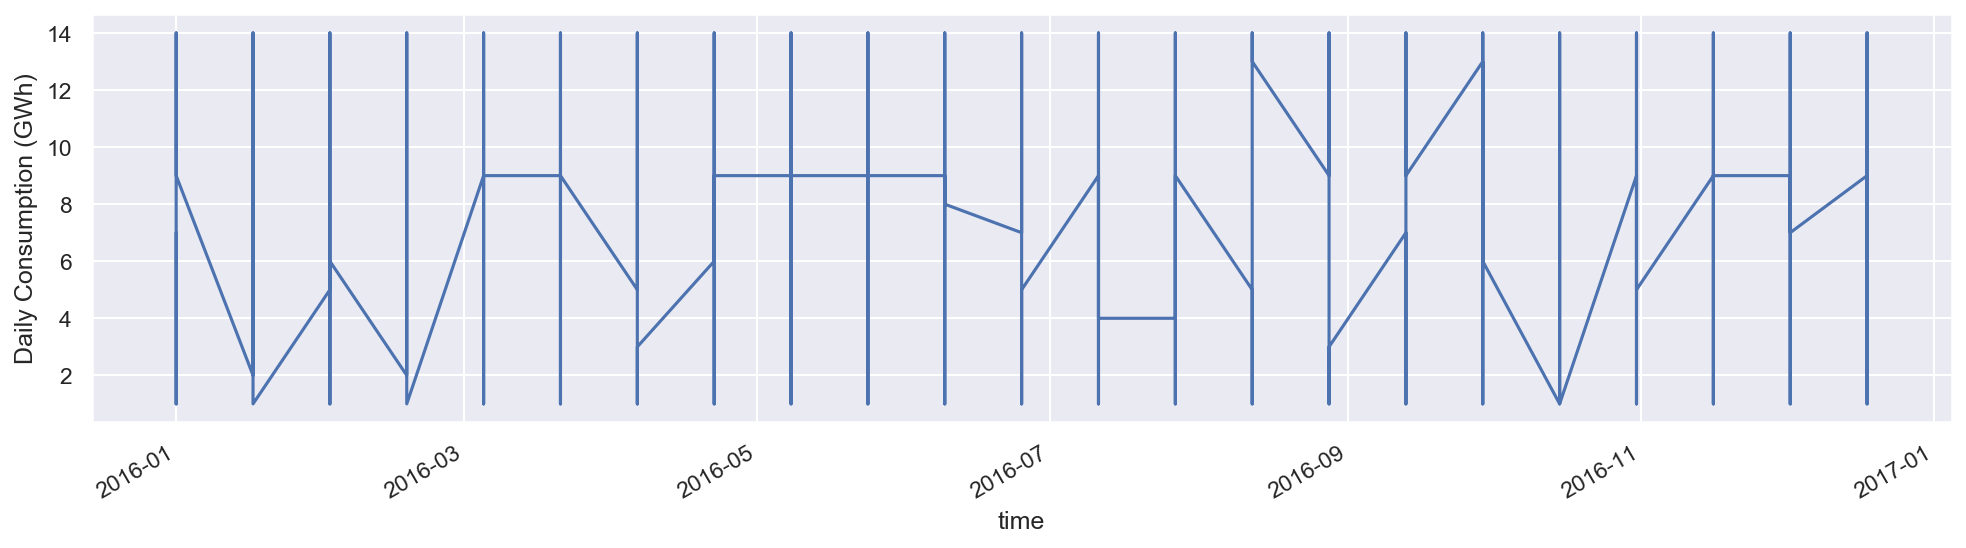

In [20]:
ax = df_power.loc['2016', 'land_cover'].plot()
ax.set_ylabel('Daily Consumption (GWh)');


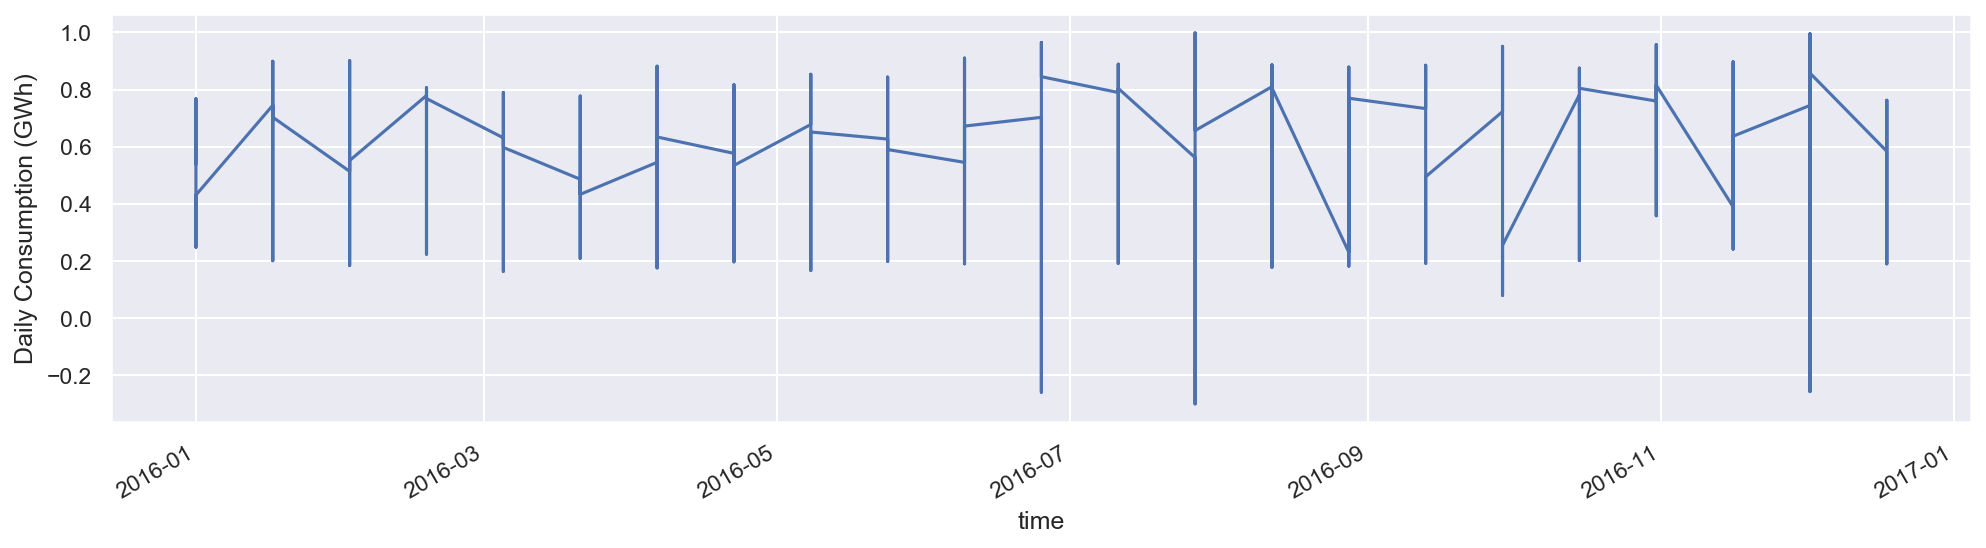

In [21]:
ax = df_power.loc['2016', 'ndvi'].plot()
ax.set_ylabel('Daily Consumption (GWh)');

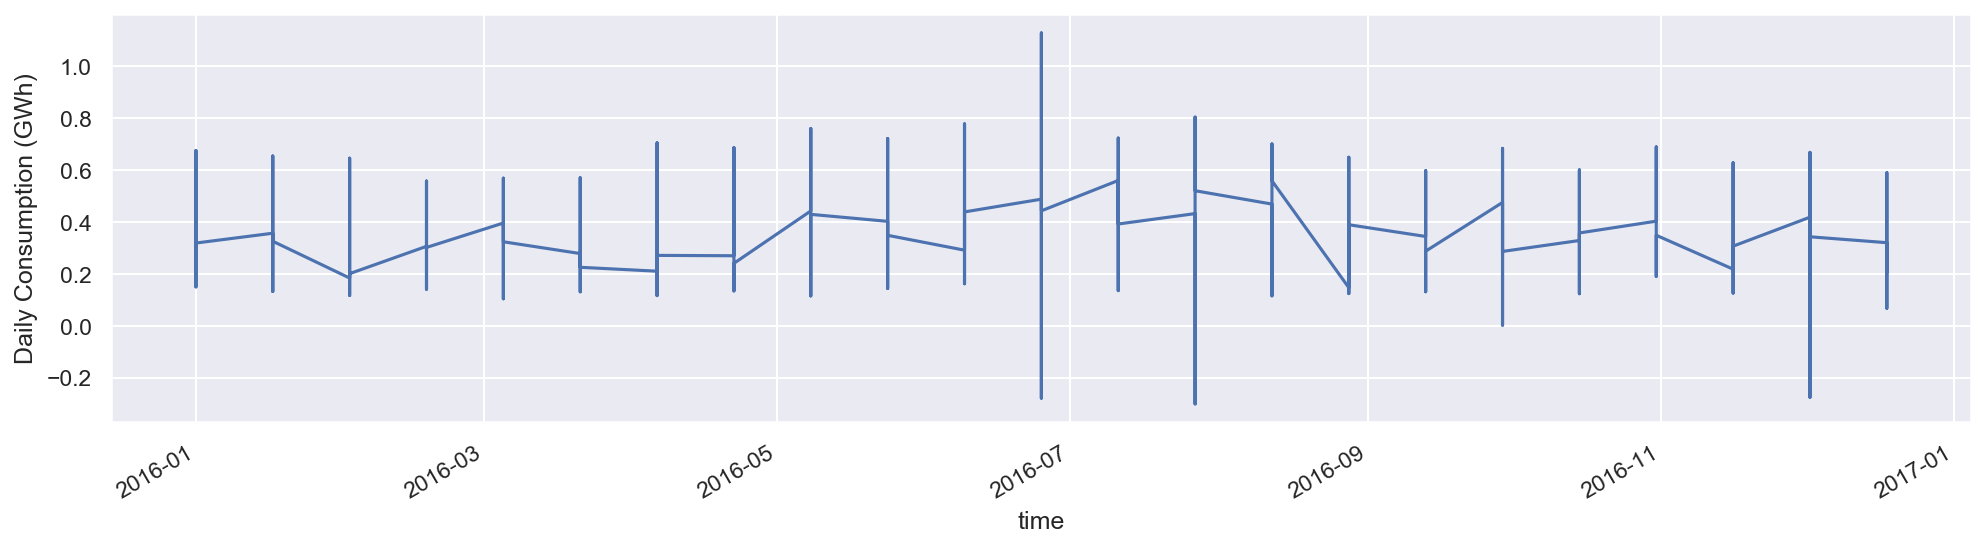

In [22]:
ax = df_power.loc['2016', 'evi'].plot()
ax.set_ylabel('Daily Consumption (GWh)');

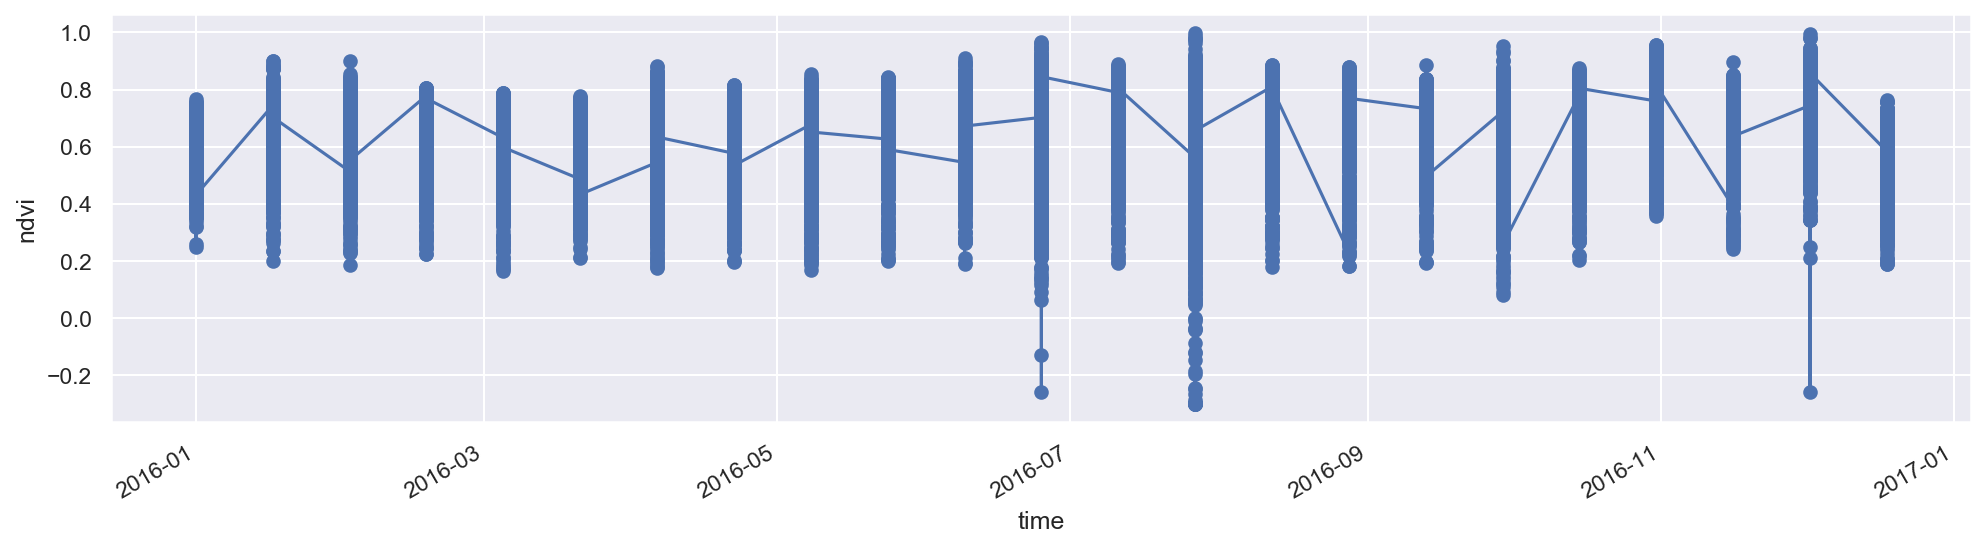

In [25]:
ax = df_power.loc['2015-12-23':'2016-12-30', 'ndvi'].plot(marker='o', linestyle='-')
ax.set_ylabel('ndvi');


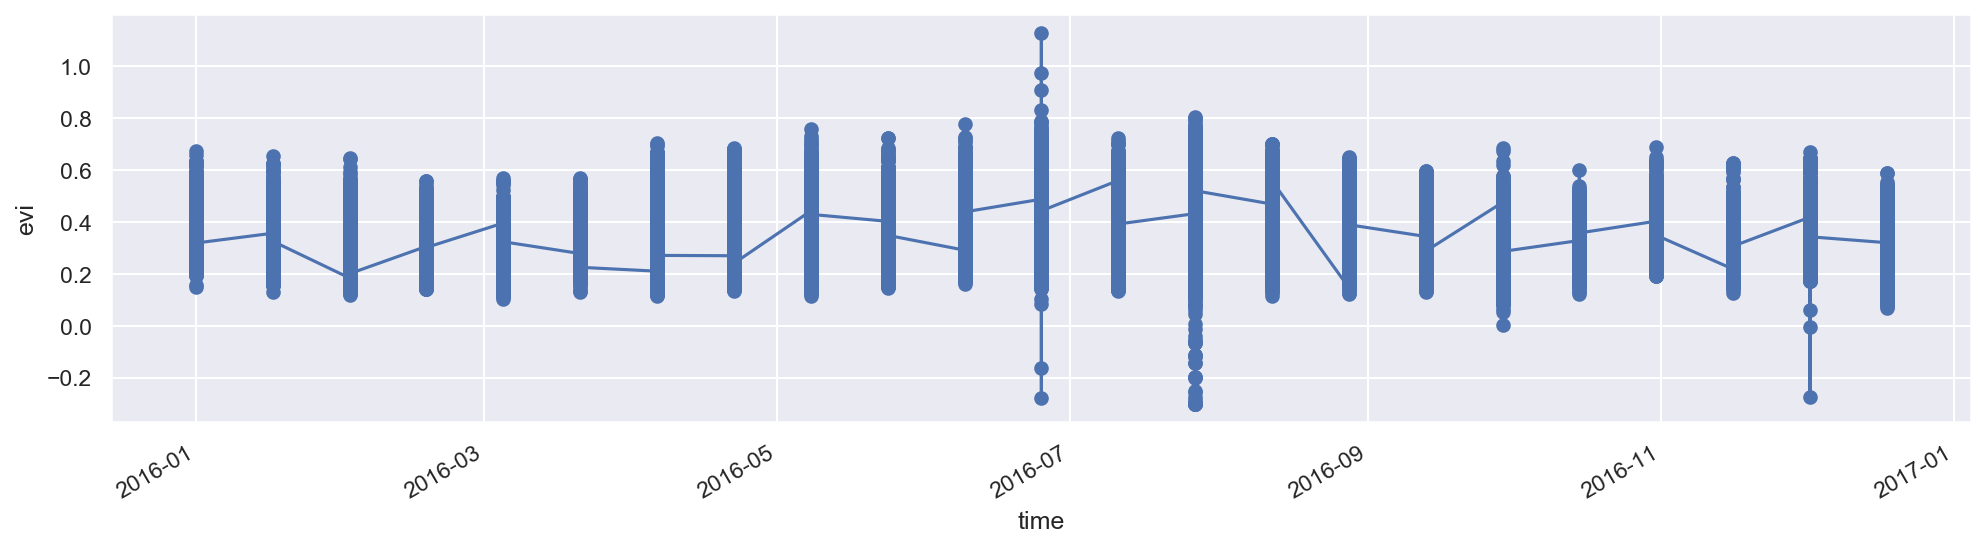

In [26]:
ax = df_power.loc['2015-12-23':'2016-12-30', 'evi'].plot(marker='o', linestyle='-')
ax.set_ylabel('evi');

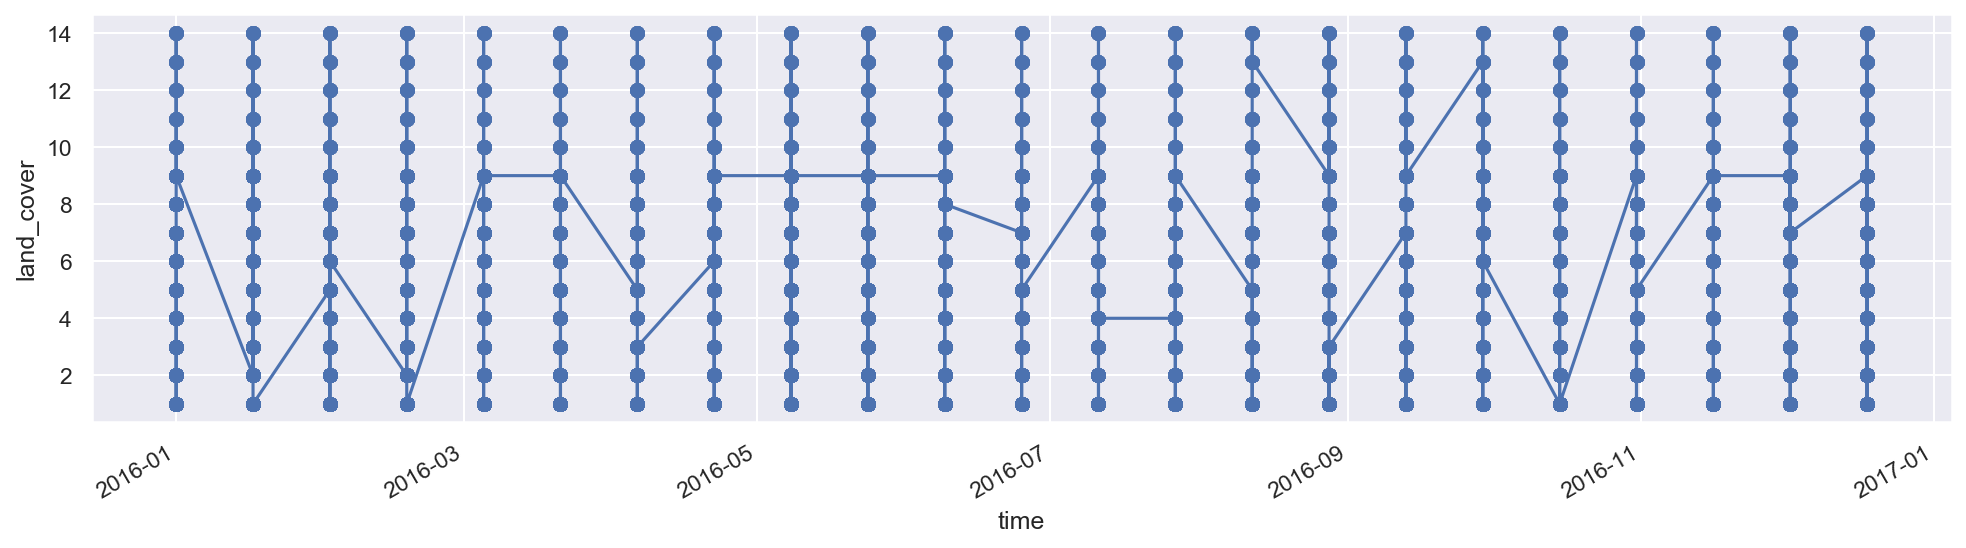

In [27]:
ax = df_power.loc['2015-12-23':'2016-12-30', 'land_cover'].plot(marker='o', linestyle='-')
ax.set_ylabel('land_cover');

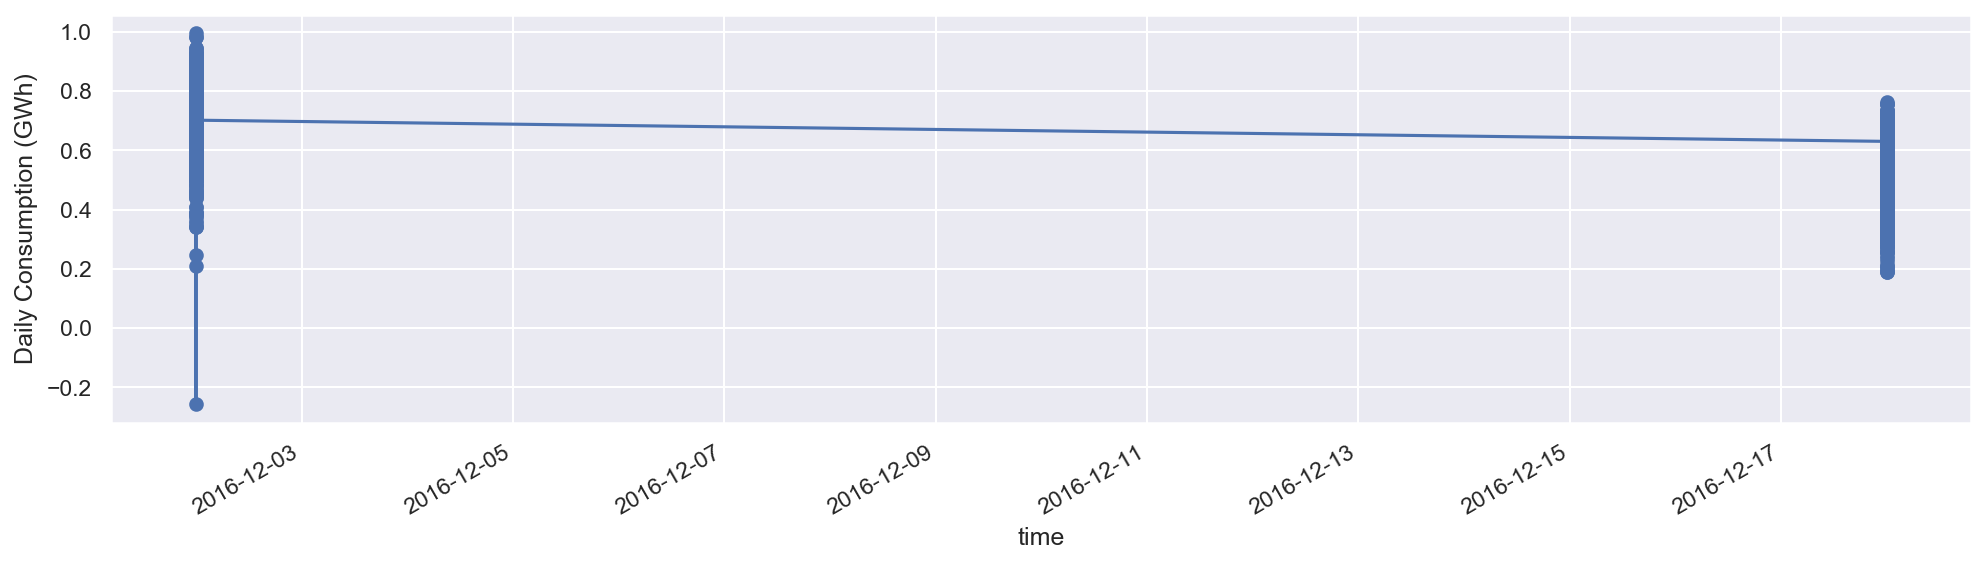

In [28]:
ax = df_power.loc['2016-12', 'ndvi'].plot(marker='o', linestyle='-')
ax.set_ylabel('Daily Consumption (GWh)');


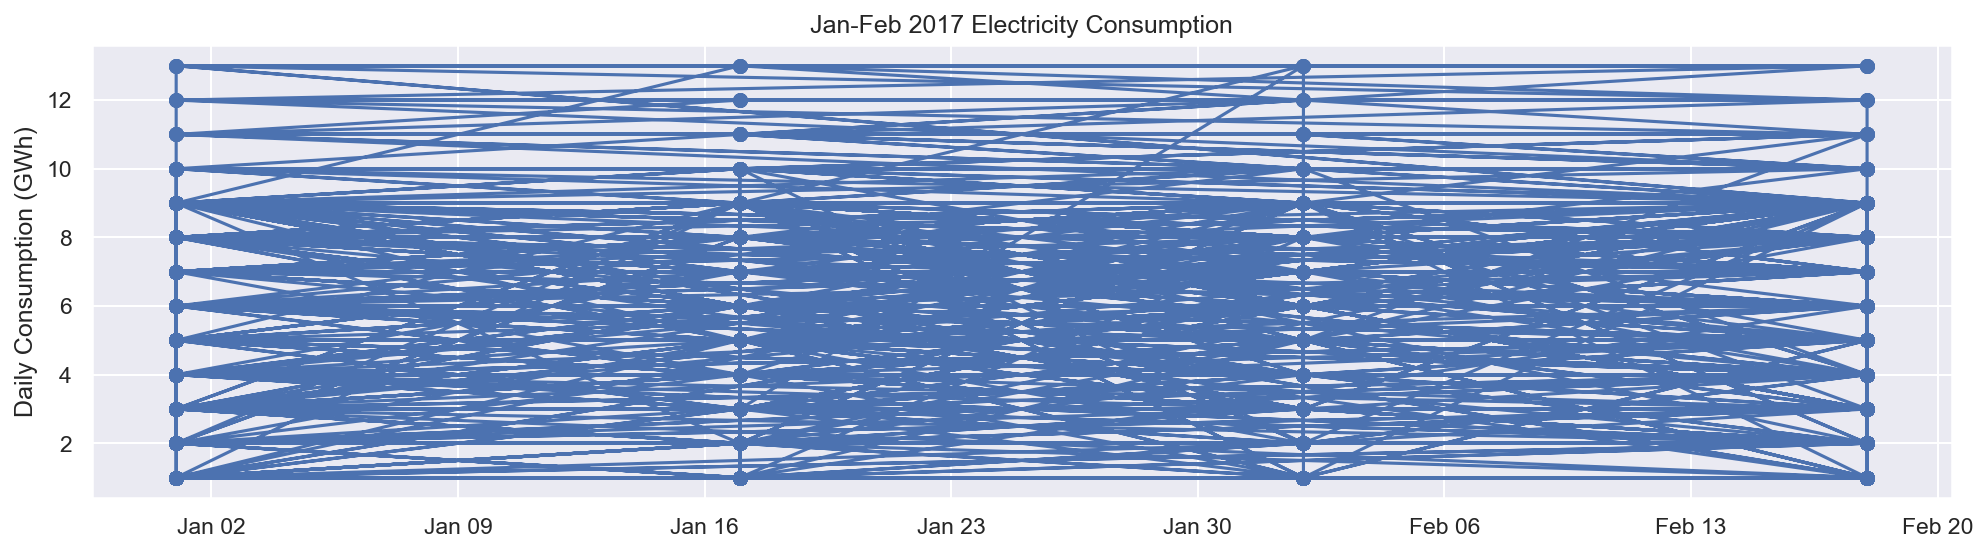

In [31]:

# import dates module from matplotlib 
import matplotlib.dates as mdates

# plot graph
fig, ax = plt.subplots()

ax.plot(df_power.loc['2017-01':'2017-02', 'land_cover'], marker='o', linestyle='-')
ax.set_ylabel('Daily Consumption (GWh)')
ax.set_title('Jan-Feb 2017 Electricity Consumption')

# to set x-axis major ticks to weekly interval, on Mondays
ax.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=mdates.MONDAY))
# to set format for x-tick labels as 3-letter month name and day number
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'));

In [32]:
df_power['pixel'].unique()

array([  1,  10, 100, ..., 997, 998, 999], dtype=int64)

In [38]:
corrmat=df_power.corr()
print(corrmat)

                   pixel          year      ndvi       evi        qa  \
pixel       1.000000e+00  0.000000e+00 -0.002851  0.221473  0.005457   
year        0.000000e+00  1.000000e+00  0.105683  0.086815  0.010840   
ndvi       -2.850618e-03  1.056829e-01  1.000000  0.766585 -0.401929   
evi         2.214726e-01  8.681491e-02  0.766585  1.000000 -0.200329   
qa          5.457291e-03  1.083964e-02 -0.401929 -0.200329  1.000000   
lai        -6.513472e-02  1.207212e-01  0.500069  0.416937 -0.181121   
land_cover  3.687895e-01  7.117484e-03 -0.189828  0.146803 -0.007128   
Year        0.000000e+00  1.000000e+00  0.105683  0.086815  0.010840   
Month      -1.507449e-20 -1.968597e-19  0.128062  0.124060  0.044752   

                 lai  land_cover          Year         Month  
pixel      -0.065135    0.368789  0.000000e+00 -1.507449e-20  
year        0.120721    0.007117  1.000000e+00 -1.968597e-19  
ndvi        0.500069   -0.189828  1.056829e-01  1.280625e-01  
evi         0.416937    0.1

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

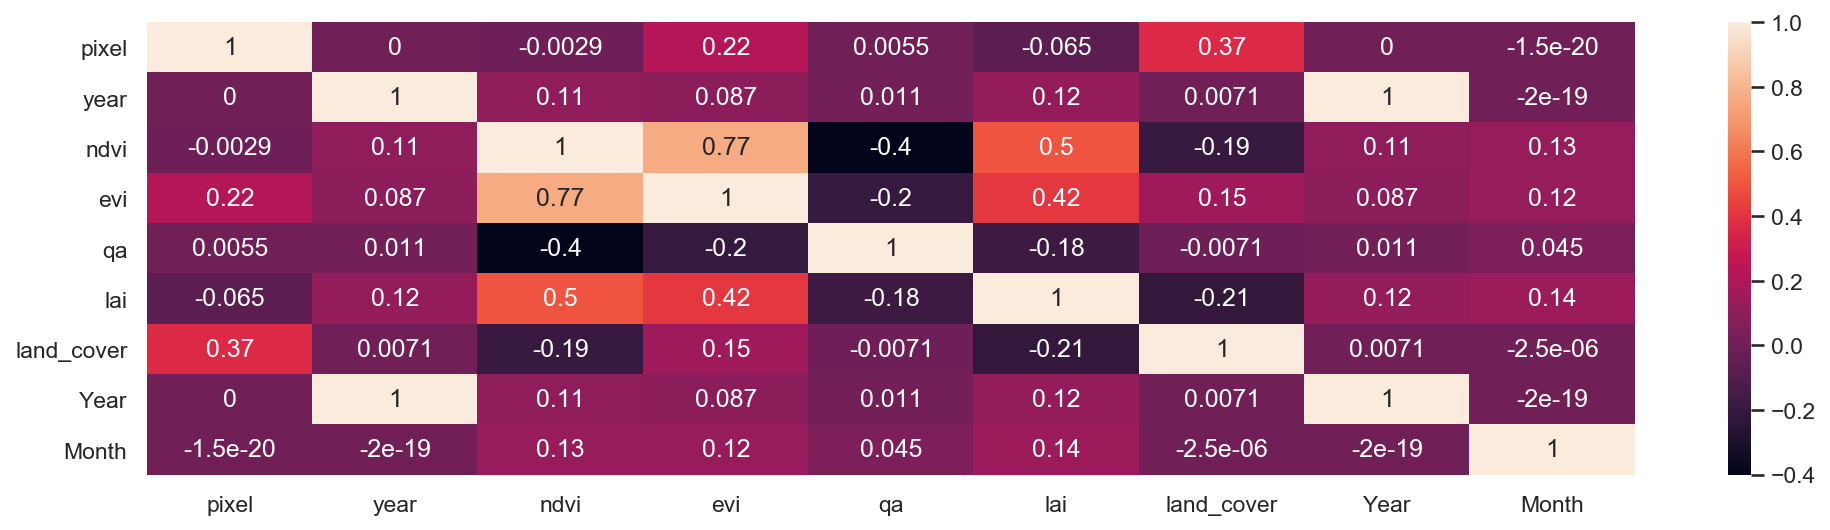

In [40]:
sns.heatmap(corrmat,annot=True)
plt.show()

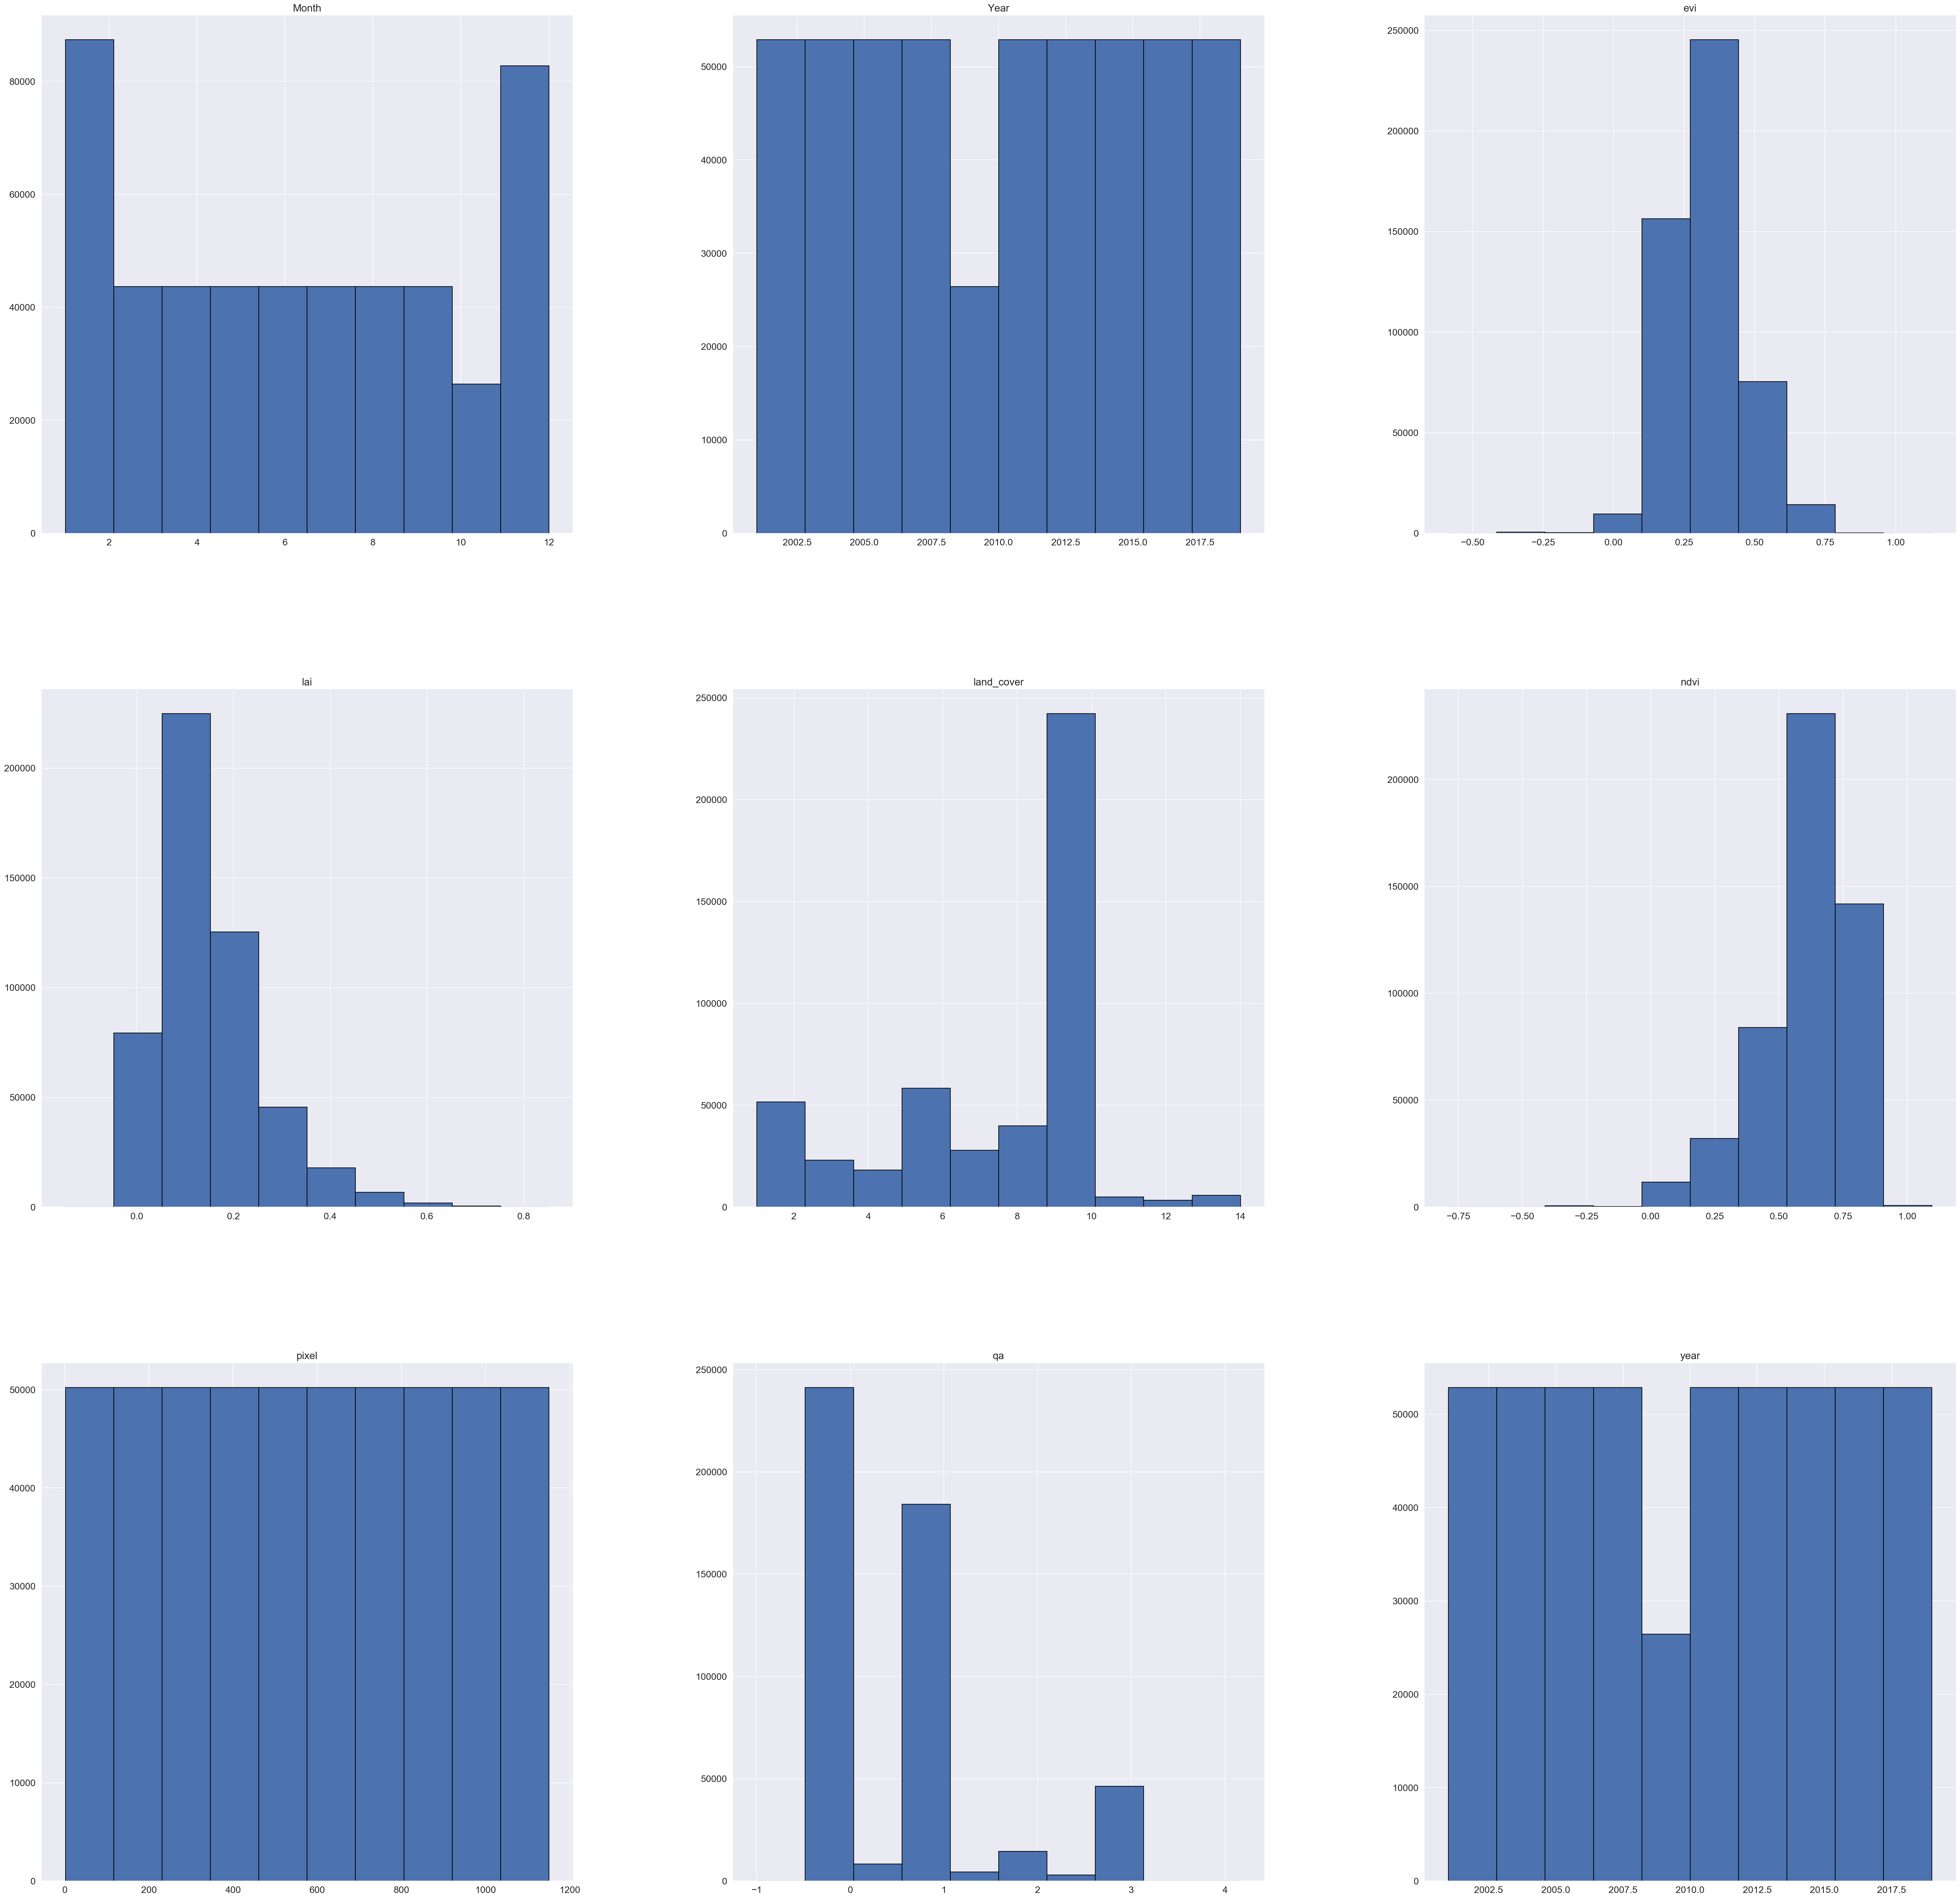

In [45]:
sns.set(font_scale=1.5)
df_power.hist(edgecolor='black', linewidth=1.2, figsize=(60, 60));